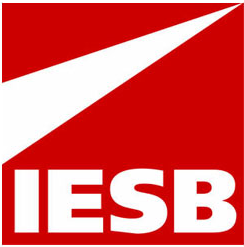


**INSTITUTO DE EDUCAÇÃO SUPERIOR – IESB**

**PÓS-GRADUAÇÃO EM CIÊNCIA DE DADOS**

**Data Mining e Machine Learning II**

**Aluna: Virgília dos Santos Rodrigues**

**Matrícula:1931133040**


## 1. Introdução

Para o desenvolvimento deste trabalho foi utilizado a base de dado HMEQ_Data, disponível em: https://www.kaggle.com/ajay1735/hmeq-data

O objetivo desta avaliação é analisar as variáveis envolvidas e verificar como elas estarão influenciando o resuldado da variável target BAD.
Abaixo são apresentadas as variáveis disponíveis na base.

* BAD - cliente inadimplente no empréstimo 0 = empréstimo reembolsado
* LOAN - Montante da solicitação de empréstimo
* MORTDUE - Valor devido da hipoteca existente
* VALUE - Valor da propriedade atual
* REASON - DebtCon = consolidação da dívida / HomeImp - melhoramento da casa
* JOB - Seis categorias profissionais
* YOJ - Anos no emprego atual
* DEROG - Número de principais relatórios depreciativos
* DELINQ - Número de linhas de crédito inadimplentes
* CLAGE - Idade da linha comercial mais antiga em meses
* NINQ - Número de linhas de crédito recentes
* CLNO - Número de linhas de crédito
* DÍVIDA - Rácio dívida / rendimento

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

## 2. Importação da Base

In [ ]:
# Carregando o arquivo
df = pd.read_csv('/kaggle/input/hmeq-data/hmeq.csv')

df.shape

In [ ]:
df.head(20).T

## 3. Tratamento dos Dados

Antes de realizar a análise da base de dados, foram identificados todos os missings. Em seguida foram apagados as linhas em que apareciam Nan na coluna "Reason".

Para coluna JOB foram imputados os dados "Other" nas linhas que tiveram Nan. E o restante dos valores que apresentaram Nan foram trocados por 0.

In [ ]:
# Tipos e quantidades
df.info()

In [ ]:
# Apagar as linhas que aparecen Nan na coluna Reason
df = df.dropna(subset=['REASON'])
df.head(20).T

In [ ]:
# Para coluna JOB eu vou imputar o dado "Other" nas linhas que tiverem Nan
df.update(df['JOB'].fillna('Other'))
df.head(20).T

In [ ]:
# Preenchendo o restante dos valores Nan com 0

df.fillna(0, inplace=True)

In [ ]:
df.info()

## 4. Análise Exploratória

Abaixo será apresentado o resultado do resumo da base, com dados de quantidade, média, desvio padrão, dentre outras informações.

In [ ]:
df.describe().T

Abaixo será apresentado o quantitativo de inadimplentes e os que possuem empréstimo reembolsado.

Ressalta-se que a quantidade de inadimplentes é muito superior à quantidade de empréstimos pagos.

In [ ]:
# Quantidade de inadimplentes e empréstimo reembolsado

df['BAD'].value_counts().plot.bar()

Conforme apresentado no gráfico abaixo, o maior valor de empréstimo solicitado foi de 89.900, sendo que a razão para solicitação foi para consolidação de dívida.

In [ ]:
# Os 10 maiores pedidos de empréstimos
# DebtCon = consolidação da dívida

df.nlargest(10, 'LOAN')[['REASON', 'YOJ', 'LOAN']].style.hide_index()

Foi realizado uma avaliação para verificar as pessoas com mais tempo de empresa, visando saber quem teria mais condições de manter o pagamento do empréstimo.

Percebeu-se que existem pessoas com até 41 anos na mesma empresa, com empréstimos com valores consideráveis.

Também pode ser visto que a média de trabalho atual varia entre 6 e 8 anos, de acordo com os seis tipos de trabalho.

In [ ]:
# Top 5 com maior tempo de empresa
df.nlargest(5, 'YOJ')[['MORTDUE', 'YOJ']].style.hide_index()

In [ ]:
# Média de tempo de trabalho no emprego atual por tipo de trabalho
df.groupby('JOB')['YOJ'].mean()

Visando avaliar o quantitativo de pessoas por tipo de trabalho, identificou-se que a maior parte dos cadastros foram feitos considerando a opção "Other".

In [ ]:
# Quantitativo por JOB
df['JOB'].value_counts().plot.bar()

No bloxplot abaixo, podemos verificar a média de valores de empréstimos, bem como perceber outliers.

No boxplot de hipoteca, pode-se perceber que a média é bem inferior ao valor de empréstimos solicitados.

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
fig=sns.boxplot(x='LOAN', data=df, orient='v', color='#ffffb2')
fig.set_title('BoxPlot de Empréstimo (LOAN)')
fig.set_ylabel('Valores de Empréstimos')

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,2)
fig=sns.boxplot(x='MORTDUE', data=df, orient='v', color='#54278f')
fig.set_title('BoxPlot de Hipoteca (MORTDUE)')
fig.set_ylabel('Valores de Hipotecas')

Abaixo apresento a distribuição do total de empréstiomos solicitados, onde percebemos que o maior volume de solicitações são na base de 10.000 a 20.000.

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
fig = df.LOAN.hist(bins=25)
fig.set_title('Distribuição de Empréstimos (LOAN)')
fig.set_ylabel('Quantidade de Observações com os Empréstimos no eixo X')

Visando avaliar a correlação entre as variáveis, abaixo apresentamos o gráfico de correlação, onde podemos perceber que a maioria das váriáveis tem correlação correlação fraca com as outras.

In [ ]:
# Correlação entre variáveis

f, ax = plt.subplots(figsize=(25,12))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linecolor='black', ax=ax, lw=.7)

## 5. Previsões

## Dividindo a Base

As florestas de decisão aleatória ou random forest são um método de aprendizado conjunto para classificação, regressão e outras tarefas que operam construindo uma infinidade de árvores de decisão no momento do treinamento e produzindo a classe que é o modo das classes (classificação) ou previsão média (regressão) das árvores individuais. Uma grande vantagem do random forest é a diminuição da possibilidade de overfitting.
Abaixo iniciamos o modelo realizando a divisão da base entre base de treino e validação (teste). 

In [ ]:
# Importando o método do scikitlearn para divisão
from sklearn.model_selection import train_test_split

In [ ]:
# Dividir a base
train, valid = train_test_split(df, random_state=42)

In [ ]:
# Verificando tamanhos
train.shape, valid.shape

In [ ]:
# Selecionando as colunas que iremos usar como entrada

# Lista das colunas não usadas
removed_cols = ['BAD', 'REASON', 'JOB']

# Criar a lista das colunas de entrada
feats = [c for c in train.columns if c not in removed_cols]

## Random Forest Regressor

In [ ]:
# Usando o modelo Random Forest

# Instanciar o modelo
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Instanciar o modelo
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

In [ ]:
df['BAD'] = pd.to_numeric(df['BAD'])

In [ ]:
# Treinando o modelo
rf.fit(train[feats], train['BAD'])

In [ ]:
# Fazendo previsões em cima dos dados de validação
preds = rf.predict(valid[feats])

In [ ]:
# Verificando as previsoes
preds

In [ ]:
# Verificando o real
valid['BAD'].head(3)

## Verificando o resultado do modelo com relação a métrica

In [ ]:
# Importando a metrica
from sklearn.metrics import mean_squared_error

In [ ]:
# Aplicando a metrica
mean_squared_error(valid['BAD'], preds)**(1/2)

In [ ]:
# Vamos prever com base nos dados de treino

train_preds = rf.predict(train[feats])

mean_squared_error(train['BAD'], train_preds)**(1/2)

## Feature Engineering

In [ ]:
# Criando dummys para a colunas JOB, NINQ e REASON
df = pd.get_dummies(df, columns=['JOB','NINQ','REASON'], dtype=int)

In [ ]:
df.shape

In [ ]:
# Correlação após dummies

f, ax = plt.subplots(figsize=(25,12))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linecolor='red', ax=ax, lw=.7)

## Aumentando a floresta em 400 arvores aleatórias

In [ ]:
# Instanciando um novo modelo
rf2 = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=400,
                           min_samples_leaf=4)

# Treinando o modelo
rf2.fit(train[feats], train['BAD'])

# Fazendo as previsões na base de validação
preds2 = rf2.predict(valid[feats])

# Aplicando a metrica
mean_squared_error(valid['BAD'], preds2)**(1/2)

## Random forest Classifier

In [ ]:
#from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf3 = RandomForestClassifier(n_estimators=200, min_samples_split=5, max_depth=4, random_state=42)
rf3.fit(train[feats], train['BAD'])
accuracy_score(valid['BAD'], rf3.predict(valid[feats]))

In [ ]:
# previsões para os dados de validação
preds_val = rf3.predict(valid[feats])

## Matriz de Confusão

In [ ]:
# importando a bilbioteca para plotar o gráfico de Matriz de Confusão
 import scikitplot as skplt

In [ ]:
# Matriz de Confusão - Dados de Validação
skplt.metrics.plot_confusion_matrix(valid['BAD'], preds_val)

In [ ]:
# Feature Importance com RF
pd.Series(rf3.feature_importances_, index=feats).sort_values().plot.barh()

## GBM

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0, max_depth=1, random_state=42)
gbm.fit(train[feats], train['BAD'])
accuracy_score(valid['BAD'], gbm.predict(valid[feats]))

In [ ]:
# Feature Importance com GBM
pd.Series(gbm.feature_importances_, index=feats).sort_values().plot.barh()

## XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=200, learning_rate=0.09, random_state=42)
xgb.fit(train[feats], train['BAD'])
accuracy_score(valid['BAD'], xgb.predict(valid[feats]))

In [ ]:
# Feature Importance com XGB
pd.Series(xgb.feature_importances_, index=feats).sort_values().plot.barh()

## Cross validation

Para confirmação do desempenho do modelo, iremos utilizar a validação cruzada fim de verificar o comportamento do mesmo modelo ao lidar com observaçoes diferentes.

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb, train[feats], train['BAD'], n_jobs=-1, cv=5)

scores, scores.mean()

## 6. Conclusão

Apesar de os dados iniciais possuírem muitos missings, após realização do tratamento de dados não houve dificuldades na implementação dos modelos. Foram realizadas as análises iniciais com o random forest regressor que apresentou o desvio padrão dos resíduos de 0,26, enquanto que, após a implementação de Feature Engineering o desvio padrão de resíduos passou a 0,27.
Nos modelos random forest classifier a acurácia ficou em 87%, no GBM 89% e o XGBoost com 91%.
E para concluir, ainda foi realizado o cross validation e a matriz de confusão para avaliar o desempenho dos modelo.